# **Food Waste Exploratory Data Analysis**

### **Benaya Imanuela - 22/494790/TK/54313** 

### **Alur Kerja EDA :**
EDA merupakan suatu metode yang digunakan untuk memahami struktur, karakteristik, dan pola dalam sebuah dataset yang melibatkan teknik statistik dan visualisasi data. Berikut adalah langkah - langkah EDA:
1. Pahami penjelasan / deskripsi dari setiap feature

2. Catat pertanyaan yang ini kita ketahui dari data
- Tentang distribusi setiap feature
- Karakteristik dan Korelasi antara masing-masing feature terhadap variabel dependen
- Semua yang ingin doketahui ketika melihat data tersebut. Tulis saja apa yang terbesit di benak.

3. Lakukan cleaning data
- Menampilkan informasi tentang data --> info(), describe()
- Cek apakah ada baris yang duplicated (data integration)
- Drop kolom non numerik yang 100% unik (data reduction) 
- Cek berapa baris yang null
    - jika lebih dari 60% - 70% yang null, maka drop saja kolomnya
    - jika kurang dari 15% yang null, maka drop saja barisnya
    - jika diantara itu, bisa dilakukan pengolahan null value (imputation=n-nearist-neighbor, forward/ backward fill, atau mean & median untuk data numerik dan modus untuk data string)

4. Lakukan feature engineering yang dapat menunjang EDA jika memungkinkan

5. Menampilkan visualisasi dari setiap pertanyaan

### **Informasi Dataset**

1. **Country**: Nama negara. 
   - **Relevansi:** Penting untuk analisis berdasarkan negara.
   
2. **combined figures (kg/capita/year)**: Jumlah pemborosan makanan per kapita per tahun (gabungan).
   - **Relevansi:** Sangat penting untuk analisis utama tentang pemborosan makanan.

3. **Household estimate (kg/capita/year)**: Estimasi pemborosan makanan di rumah tangga per kapita per tahun.
   - **Relevansi:** Penting untuk analisis pemborosan di rumah tangga per individu.

4. **Household estimate (tonnes/year)**: Estimasi total pemborosan makanan di rumah tangga dalam ton per tahun.
   - **Relevansi:** Penting untuk analisis pemborosan di rumah tangga untuk seluruh populasi.

5. **Retail estimate (kg/capita/year)**: Estimasi pemborosan makanan di sektor ritel per kapita per tahun.
   - **Relevansi:** Penting untuk analisis sektor ritel per individu.

6. **Retail estimate (tonnes/year)**: Estimasi total pemborosan makanan di sektor ritel dalam ton per tahun.
   - **Relevansi:** Penting untuk analisis sektor ritel untuk seluruh populasi.

7. **Food service estimate (kg/capita/year)**: Estimasi pemborosan makanan di sektor layanan makanan per kapita per tahun.
   - **Relevansi:** Penting untuk analisis sektor layanan makanan per individu.

8. **Food service estimate (tonnes/year)**: Estimasi total pemborosan makanan di sektor layanan makanan dalam ton per tahun.
   - **Relevansi:** Penting untuk analisis sektor layanan makanan untuk seluruh populasi.

9. **Confidence in estimate**: Tingkat kepercayaan dalam estimasi (misal: Very Low Confidence, Low Confidence).
   - **Relevansi:** Mungkin relevan untuk evaluasi kualitas data, tetapi bisa di-drop jika fokus pada kuantitatif.

10. **M49 code**: Kode negara berdasarkan standar PBB.
    - **Relevansi:** Bisa di-drop karena **Country** sudah mencakup informasi yang diperlukan.

11. **Region**: Wilayah geografis negara.
    - **Relevansi:** Penting untuk analisis geografis yang lebih luas.

12. **Source**: Sumber data.
    - **Relevansi:** Bisa di-drop jika tidak mempengaruhi analisis langsung.

### **Pertanyaan**

1. Negara mana yang memiliki tingkat pemborosan makanan gabungan (combined figures) tertinggi dan terendah (kg/capita/year)?

2. Bagaimana perbandingan pemborosan makanan antara rumah tangga (household), ritel (retail), dan layanan makanan (food service) di negara-negara dengan pemborosan tertinggi?

3. Wilayah geografis (Region) mana dengan tingkat pemborosan makanan (kg/capita/year) tertinggi dan terendah?

4. Negara mana yang memiliki perbedaan terbesar antara pemborosan makanan di rumah tangga dan di layanan makanan?

5. Bagaimana tren pemborosan makanan di sektor ritel dibandingkan dengan sektor lainnya?

6. **Sektor apa yang menghasilkan pemborosan makanan terbesar di setiap wilayah geografis?**


### **Lakukan Data Cleaning**

#### **0. Import Package**

In [35]:
import numpy as np
import pandas as pd 
import datetime
import seaborn as sns 
import matplotlib.pyplot as plt 


#### **1. Menampilkan Informasi Data**

In [36]:
df = pd.read_csv("./food-waste-dataset/Food Waste data and research - by country.csv")
df.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [38]:
# df.sample(5) 
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [39]:
df["Region"].value_counts()
# df["Country"].value_counts()

Sub-Saharan Africa                 48
Latin America and the Caribbean    42
Western Asia                       18
Southern Europe                    15
Northern Europe                    12
South-eastern Asia                 11
Eastern Europe                     10
Southern Asia                       9
Western Europe                      9
Eastern Asia                        7
Micronesia                          7
Northern Africa                     6
Melanesia                           5
Central Asia                        5
Northern America                    4
Polynesia                           4
Australia and New Zealand           2
Name: Region, dtype: int64

#### **2. Cek Apakah ada Baris yang duplikat (data integration)**

In [40]:
df[df.duplicated()] # menampilkan berapa baris yang duplikat

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source


Berdasarkan output di atas, dapat disimpulkan **tidak ada baris yang duplikat**.

#### **3. Drop Kolom yang 100% Unik dan Tidak Dibutuhkan untuk Analisis Mendalam (data reduction)**

In [41]:
# Menampilkan jumlah nilai unik setiap kolom
for col in df.columns:
    print(f"{col} : {len(df[col].unique())} labels")

Country : 214 labels
combined figures (kg/capita/year) : 62 labels
Household estimate (kg/capita/year) : 52 labels
Household estimate (tonnes/year) : 214 labels
Retail estimate (kg/capita/year) : 16 labels
Retail estimate (tonnes/year) : 213 labels
Food service estimate (kg/capita/year) : 19 labels
Food service estimate (tonnes/year) : 213 labels
Confidence in estimate : 4 labels
M49 code : 214 labels
Region : 17 labels
Source : 214 labels


Berdasarkan output di atas dan **informasi deskripsi dataset**. Diputuskan untuk men-drop kolom **M49 code** dan **Source** karena tidak memiliki korelasi untuk analisis lebih lanjut

In [42]:
# Jangan lupa copy df ke df 1 untuk trial & error
df1 = df.copy()

# drop kolom M49
df1.drop(["M49 code", "Source"], axis=1, inplace=True)
df1.head()

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,Region
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,Southern Asia
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,Southern Europe
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,Northern Africa
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,Southern Europe
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,Sub-Saharan Africa


#### **4. Drop Kolom Confidende in estimate yang bernilai `Very Low Confidence`**


In [43]:
# Menghapus baris dimana nilai pada kolom 'Confidence in estimate' adalah 'Very Low Confidence'
df1 = df1[df1['Confidence in estimate'] != 'Very Low Confidence']

df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 3 to 206
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 84 non-null     object
 1   combined figures (kg/capita/year)       84 non-null     int64 
 2   Household estimate (kg/capita/year)     84 non-null     int64 
 3   Household estimate (tonnes/year)        84 non-null     int64 
 4   Retail estimate (kg/capita/year)        84 non-null     int64 
 5   Retail estimate (tonnes/year)           84 non-null     int64 
 6   Food service estimate (kg/capita/year)  84 non-null     int64 
 7   Food service estimate (tonnes/year)     84 non-null     int64 
 8   Confidence in estimate                  84 non-null     object
 9   Region                                  84 non-null     object
dtypes: int64(7), object(3)
memory usage: 7.2+ KB


#### **5. Cek Apakah ada Baris yang Kosong**

In [44]:
# Menampilkan jumlah nilai kosong tiap kolom dalam persen
df1.isnull().sum()/len(df)*100


Country                                   0.0
combined figures (kg/capita/year)         0.0
Household estimate (kg/capita/year)       0.0
Household estimate (tonnes/year)          0.0
Retail estimate (kg/capita/year)          0.0
Retail estimate (tonnes/year)             0.0
Food service estimate (kg/capita/year)    0.0
Food service estimate (tonnes/year)       0.0
Confidence in estimate                    0.0
Region                                    0.0
dtype: float64

Berdasarkan output di atas, dapat disimpulkan **tidak ada baris yang kosong**

#### **6. Menyimpan data hasil cleaning**

In [45]:
# Menyimpan DataFrame df1 ke file CSV
df1.to_csv('./food-waste-dataset/cleaned-&-high-quality_food-waste-dataset.csv', index=False)


### **Menampilkan Visualisasi Dari Setiap Pertanyaan**

#### **1. Negara mana yang memiliki tingkat pemborosan makanan gabungan (combined figures) tertinggi dan terendah (kg/capita/year)?**


/tmp/ipykernel_18697/1635210661.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=highest_combined['Country'], y=highest_combined['combined figures (kg/capita/year)'], palette='Blues_d')


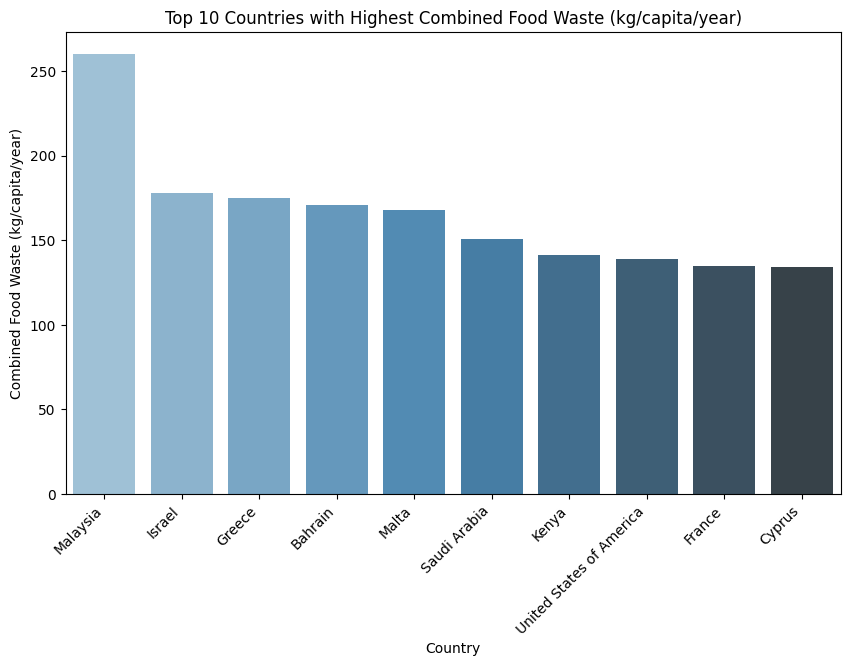

/tmp/ipykernel_18697/1635210661.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lowest_combined['Country'], y=lowest_combined['combined figures (kg/capita/year)'], palette='Reds_d')


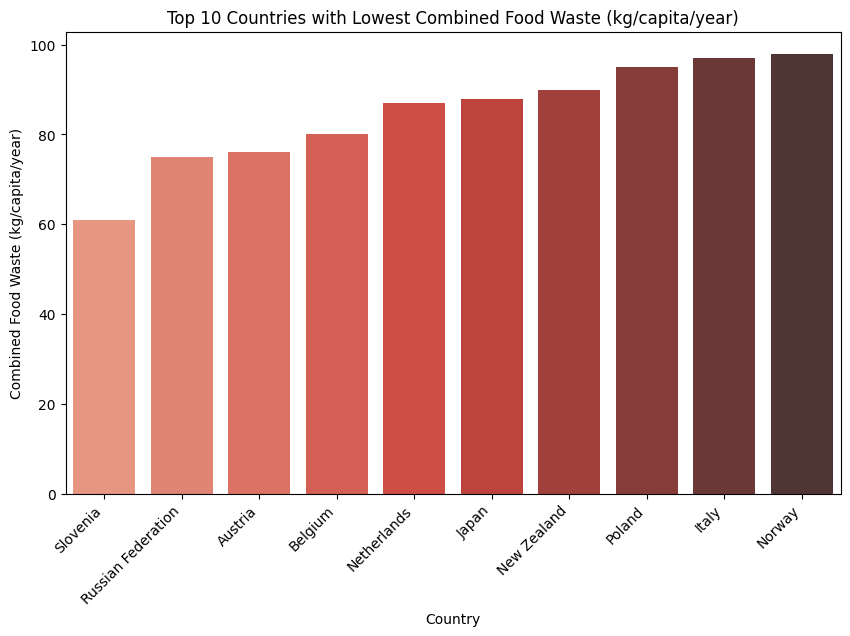

In [46]:
plt.figure(figsize=(10, 6))
highest_combined = df1.nlargest(10, 'combined figures (kg/capita/year)')
lowest_combined = df1.nsmallest(10, 'combined figures (kg/capita/year)')

sns.barplot(x=highest_combined['Country'], y=highest_combined['combined figures (kg/capita/year)'], palette='Blues_d')
plt.title('Top 10 Countries with Highest Combined Food Waste (kg/capita/year)')
plt.ylabel('Combined Food Waste (kg/capita/year)')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=lowest_combined['Country'], y=lowest_combined['combined figures (kg/capita/year)'], palette='Reds_d')
plt.title('Top 10 Countries with Lowest Combined Food Waste (kg/capita/year)')
plt.ylabel('Combined Food Waste (kg/capita/year)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan hasil di atas, dapat disimpulkan **Malaysia** merupakan negara dengan tingkat pemborosan makanan tertinggi dan **Slovenia** terendah.

#### **2. Bagaimana perbandingan pemborosan makanan antara rumah tangga (household), ritel (retail), dan layanan makanan (food service) di negara-negara dengan pemborosan tertinggi?**



<Figure size 1000x600 with 0 Axes>

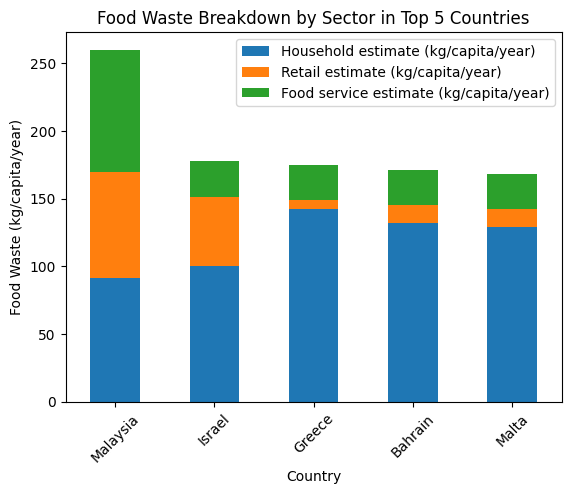

In [47]:
plt.figure(figsize=(10, 6))
top_countries = df1.nlargest(5, 'combined figures (kg/capita/year)')

top_countries.set_index('Country')[['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']].plot(kind='bar', stacked=True)
plt.title('Food Waste Breakdown by Sector in Top 5 Countries')
plt.ylabel('Food Waste (kg/capita/year)')
plt.xticks(rotation=45)
plt.show()

Dapat dilihat dari grafik, terdapat pola bahwa dari kelima negara penyumbang food waste terbesar bahwa **penyebab pemborosan makanan tertinggi** yaitu dari **sektor household, dilanjut food service, kemudian retail**

#### **3. Wilayah geografis (Region) mana dengan tingkat pemborosan makanan (kg/capita/year) tertinggi dan terendah?**




/tmp/ipykernel_18697/3496586554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette='viridis')


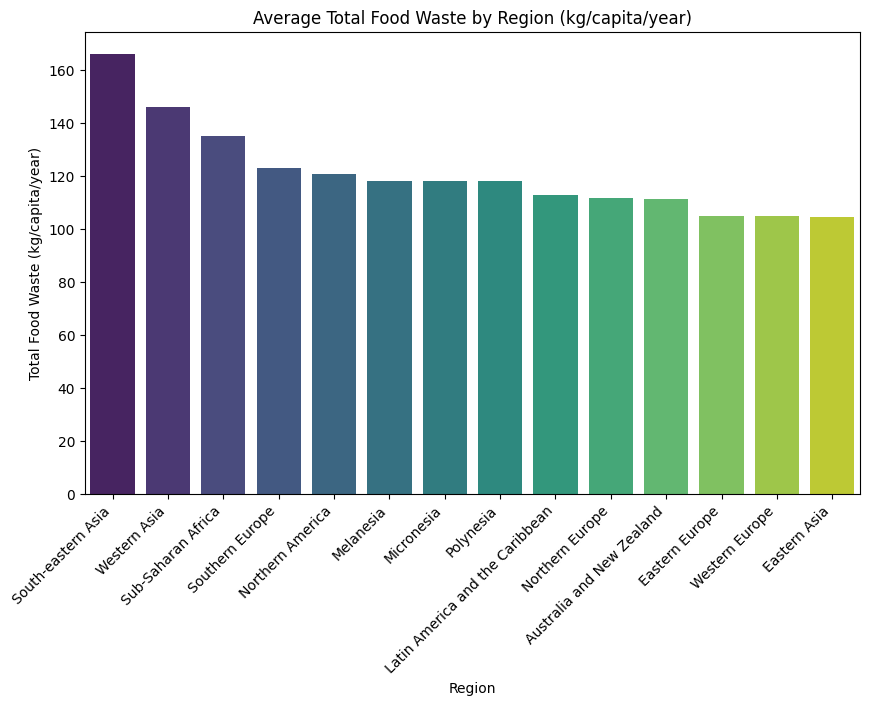

In [48]:
plt.figure(figsize=(10, 6))
region_avg = df1.groupby('Region')['combined figures (kg/capita/year)'].mean().sort_values(ascending=False)

sns.barplot(x=region_avg.index, y=region_avg.values, palette='viridis')
plt.title('Average Total Food Waste by Region (kg/capita/year)')
plt.ylabel('Total Food Waste (kg/capita/year)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan grafik, wilayah **South-eastern Asia** merupakan wilayah dengan tingkat pemborosan tertinggi dan **Eastern Asia** dengan tingkat pemborosan terendah

#### **4. Negara mana yang memiliki perbedaan terbesar antara pemborosan makanan di rumah tangga dan di layanan makanan?**



/tmp/ipykernel_18697/2393752048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=largest_difference['Country'], y=largest_difference['Household vs Food Service Difference'], palette='coolwarm')


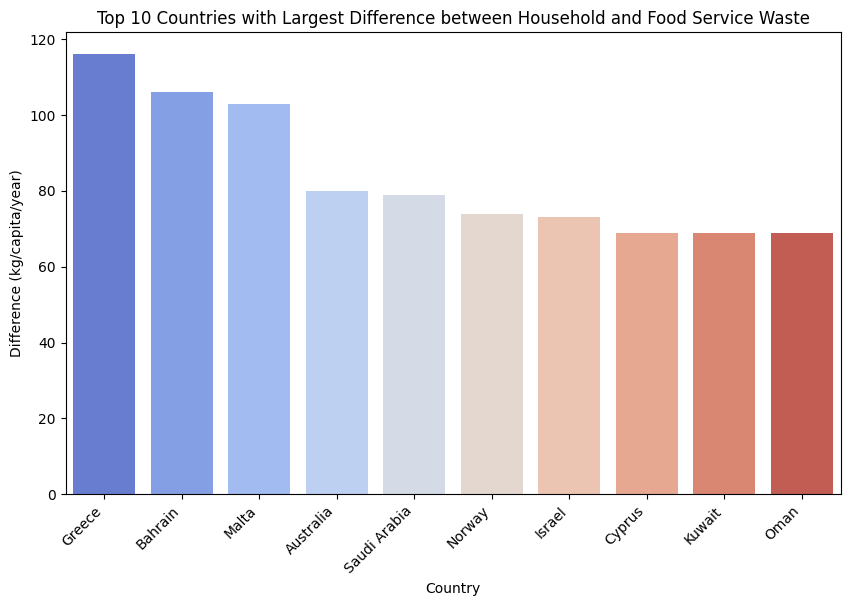

In [49]:
plt.figure(figsize=(10, 6))
df1['Household vs Food Service Difference'] = abs(df1['Household estimate (kg/capita/year)'] - df1['Food service estimate (kg/capita/year)'])
largest_difference = df1.nlargest(10, 'Household vs Food Service Difference')

sns.barplot(x=largest_difference['Country'], y=largest_difference['Household vs Food Service Difference'], palette='coolwarm')
plt.title('Top 10 Countries with Largest Difference between Household and Food Service Waste')
plt.ylabel('Difference (kg/capita/year)')
plt.xticks(rotation=45, ha='right')
plt.show()

Berdasarkan output, negara **Greece** merupakan negara yang memiliki perbedaan terbesar antara pemborosan makanan di household dan food service

#### **5. Bagaimana tren pemborosan makanan di sektor ritel dibandingkan dengan sektor lainnya?**



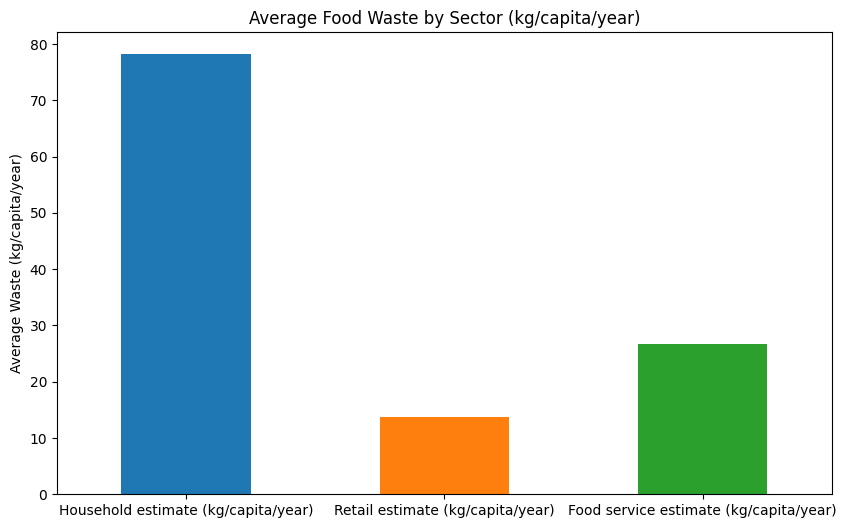

In [50]:
plt.figure(figsize=(10, 6))
sector_totals = df1[['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']].mean()

sector_totals.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Food Waste by Sector (kg/capita/year)')
plt.ylabel('Average Waste (kg/capita/year)')
plt.xticks(rotation=0)
plt.show()

Berdasarkan rata rata pemborosan makanan di seluruh negara, sektor **retail** merupakan sektor yang paling rendah melakukan pemborosan makanan 

#### **6. Sektor apa yang menghasilkan pemborosan makanan terbesar di setiap wilayah geografis?**

<Figure size 1000x600 with 0 Axes>

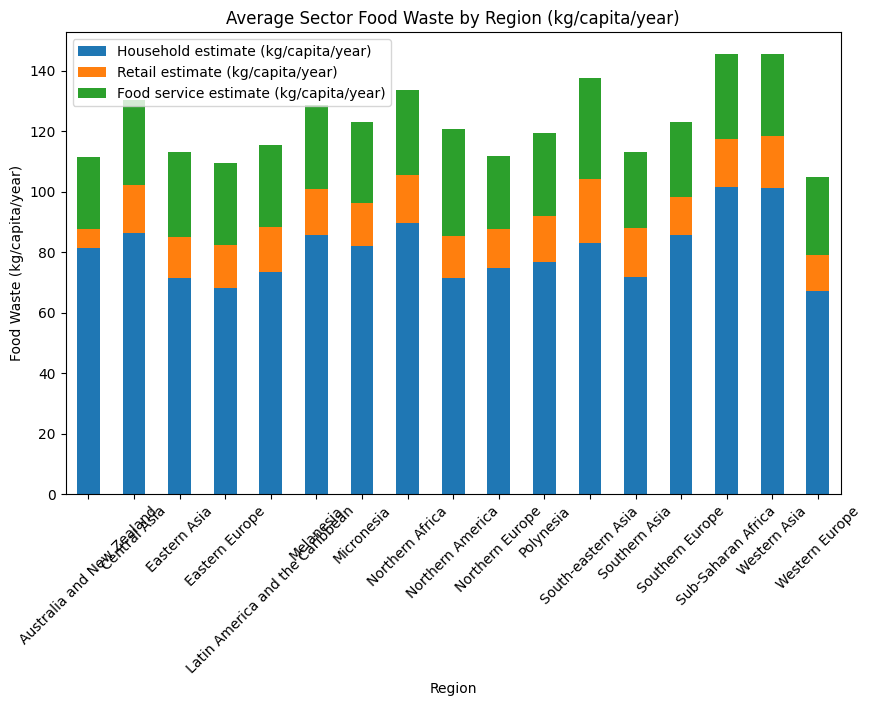

In [51]:
plt.figure(figsize=(10, 6))
sector_waste_by_region = df.groupby('Region')[['Household estimate (kg/capita/year)', 'Retail estimate (kg/capita/year)', 'Food service estimate (kg/capita/year)']].mean()

sector_waste_by_region.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Sector Food Waste by Region (kg/capita/year)')
plt.ylabel('Food Waste (kg/capita/year)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

Berdasarkan output di atas, sektor **household** merupakan penyumbang terbesar pemborosan makanan

### **Kesimpulan Insight yang Didapat**

1. **Malaysia** merupakan negara dengan tingkat pemborosan makanan tertinggi dan **Slovenia** terendah.

2. Dari kelima negara penyumbang food waste terbesar bahwa **penyebab pemborosan makanan tertinggi** yaitu dari **sektor household, dilanjut food service, kemudian retail**.

3. Berdasarkan grafik, wilayah **South-eastern Asia** merupakan wilayah dengan tingkat pemborosan tertinggi dan **Eastern Asia** dengan tingkat pemborosan terendah.

4. Negara **Greece** merupakan negara yang memiliki perbedaan terbesar antara pemborosan makanan di household dan food service.

5. Berdasarkan rata - rata pemborosan makanan di seluruh negara, sektor **retail** merupakan sektor yang paling rendah melakukan pemborosan makanan. 

6. Sektor **household** merupakan penyumbang terbesar pemborosan makanan.